# Organización de Datos - TP 1 - CLICKS

Alumnos:
- *Rodriguez, Agustín*
- *Scetta, María de los Ángeles*

In [1]:
#Carga de librerías a utilizar
import pandas as pd
import numpy as np
import missingno as msno
import calendar
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Carga de datos recibidos
clicks=pd.read_csv('../data/raw/clicks.csv.gzip', compression='gzip', parse_dates=['created'])

**Clicks**
--------------------------------

In [3]:
#Cantidad de registros y variables
clicks.shape

(26351, 20)

In [4]:
#Revisión de valores nulos
clicks.isna().sum()

advertiser_id          0
action_id          26351
source_id              0
created                0
country_code           0
latitude               0
longitude              0
wifi_connection        0
carrier_id            11
trans_id               0
os_minor              12
agent_device       23108
os_major              12
specs_brand            0
brand              20116
timeToClick         3374
touchX              3340
touchY              3340
ref_type               0
ref_hash               0
dtype: int64

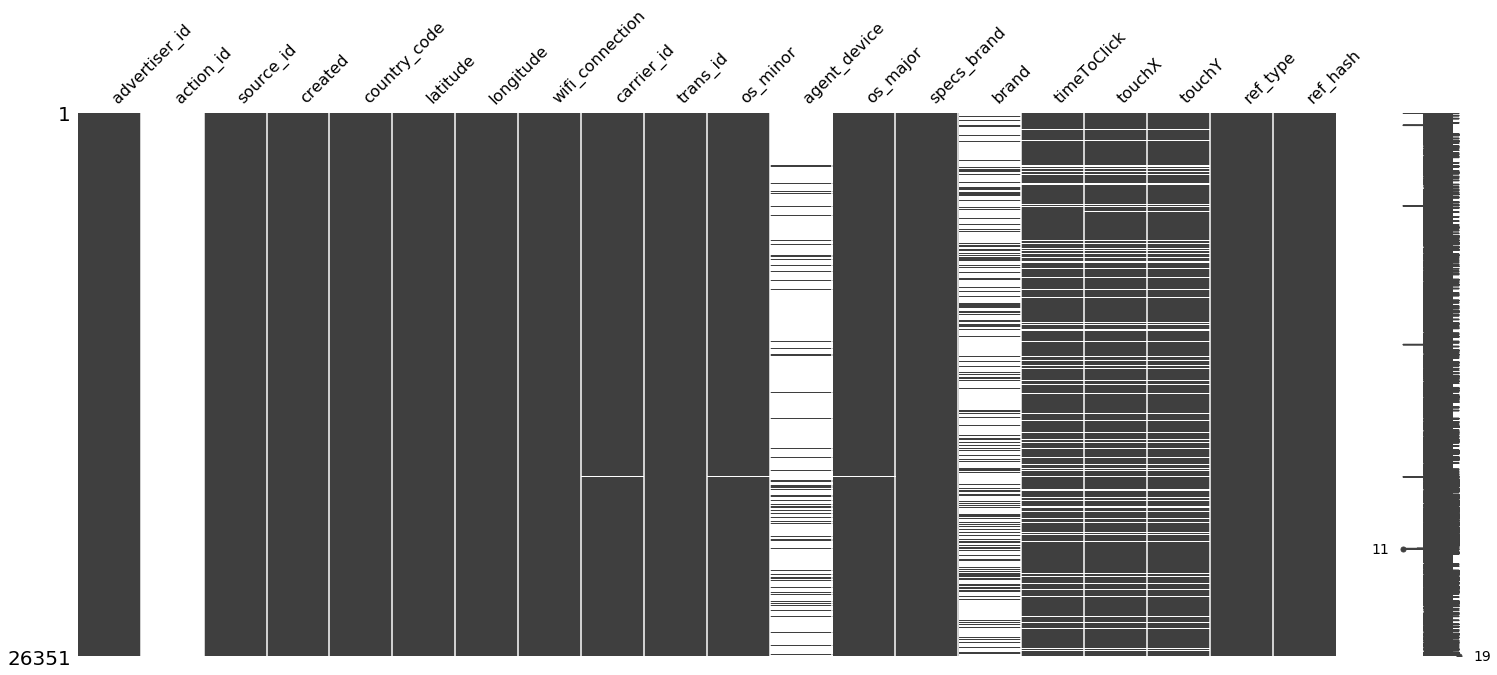

In [4]:
msno.matrix(clicks)
plt.savefig('clicks_matrix.png')

In [7]:
#Revisión de la estructura de datos
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


###  **Análisis de las variables del dataset**

In [5]:
#Búsqueda de valores únicos
clicks.nunique()

advertiser_id          7
action_id              0
source_id             11
created            26347
country_code           1
latitude              78
longitude             81
wifi_connection        1
carrier_id            55
trans_id           26351
os_minor              28
agent_device         190
os_major              12
specs_brand            5
brand                 13
timeToClick        17294
touchX              1001
touchY              3914
ref_type               4
ref_hash           17119
dtype: int64

#### country_code

In [39]:
clicks.country_code.value_counts()

6333597102633388268    26351
Name: country_code, dtype: int64

#### created

In [3]:
#Revisión de la variable created
clicks['fecha'] = clicks['created'].dt.date
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,...,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,fecha
0,2,NaN,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,...,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093,2019-03-06
1,0,NaN,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,...,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666,2019-03-08
2,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,...,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647,2019-03-08
3,2,NaN,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,...,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525,2019-03-06
4,2,NaN,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,...,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525,2019-03-06


In [4]:
#Función para nombrar días de la semana
def dia_semana(fecha):
    return calendar.day_name[fecha.weekday()]

In [5]:
clicks['dia_semana'] = clicks['fecha'].map(dia_semana)
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,...,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,fecha,dia_semana
0,2,NaN,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,...,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093,2019-03-06,Wednesday
1,0,NaN,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,...,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666,2019-03-08,Friday
2,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,...,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647,2019-03-08,Friday
3,2,NaN,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,...,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525,2019-03-06,Wednesday
4,2,NaN,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,...,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525,2019-03-06,Wednesday


In [6]:
#Cantidad de clicks en anuncios por día de la semana
clicks.groupby(["fecha", "dia_semana"]).size().to_frame('cant_clicks').reset_index()

,fecha,dia_semana,cant_clicks
0,2019-03-05,Tuesday,31
1,2019-03-06,Wednesday,14
2,2019-03-07,Thursday,2989
3,2019-03-08,Friday,2839
4,2019-03-09,Saturday,3283
5,2019-03-10,Sunday,3966
6,2019-03-11,Monday,4557
7,2019-03-12,Tuesday,5204
8,2019-03-13,Wednesday,3468


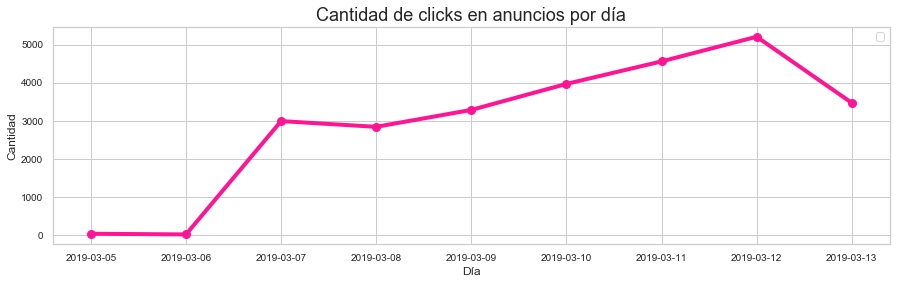

In [7]:
#Visualizar los clicks en los anuncios por día
sns.set(style="whitegrid")
clicks.groupby("fecha").size().plot.line(rot=0, figsize=(15,4), color='deeppink', linewidth=4, fontsize=10, marker='o', markersize=8);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Día', fontsize=12)
plt.title('Cantidad de clicks en anuncios por día', fontsize=18)
plt.legend('')
plt.savefig("clicks_dia.png")
plt.show()

In [8]:
#Revisión de los clicks por hora
clicks['hora'] = clicks['created'].dt.hour
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,...,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,fecha,dia_semana,hora
0,2,NaN,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,...,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093,2019-03-06,Wednesday,22
1,0,NaN,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,...,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666,2019-03-08,Friday,10
2,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,...,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647,2019-03-08,Friday,15
3,2,NaN,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,...,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525,2019-03-06,Wednesday,3
4,2,NaN,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,...,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525,2019-03-06,Wednesday,3


In [9]:
hora_group=clicks.groupby(["fecha","dia_semana", "hora"]).size().to_frame('cant_clicks').reset_index()
hora_group.head()

,fecha,dia_semana,hora,cant_clicks
0,2019-03-05,Tuesday,1,2
1,2019-03-05,Tuesday,2,7
2,2019-03-05,Tuesday,5,1
3,2019-03-05,Tuesday,6,5
4,2019-03-05,Tuesday,13,1


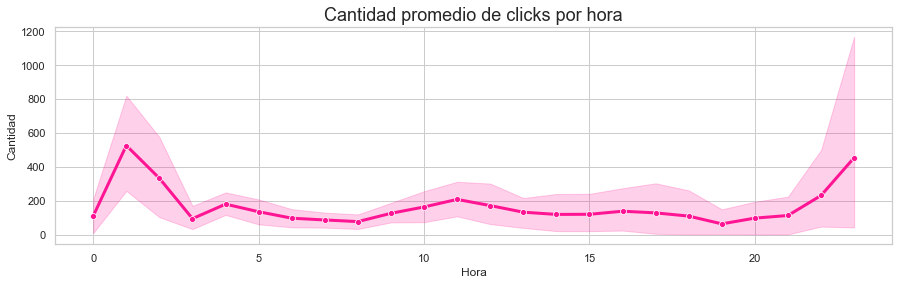

In [10]:
#Análisis de cantidad promedio de clicks por hora
sns.set(style="whitegrid")
fig, ax=plt.subplots(1,1, figsize=(15,4))
sns.lineplot('hora', 'cant_clicks', color='deeppink', linewidth=3, marker='o', markersize=6, data=hora_group, ax=ax)
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Hora', fontsize=12)
plt.title('Cantidad promedio de clicks por hora', fontsize=18)
plt.savefig("clicks_hora.png")
plt.show()

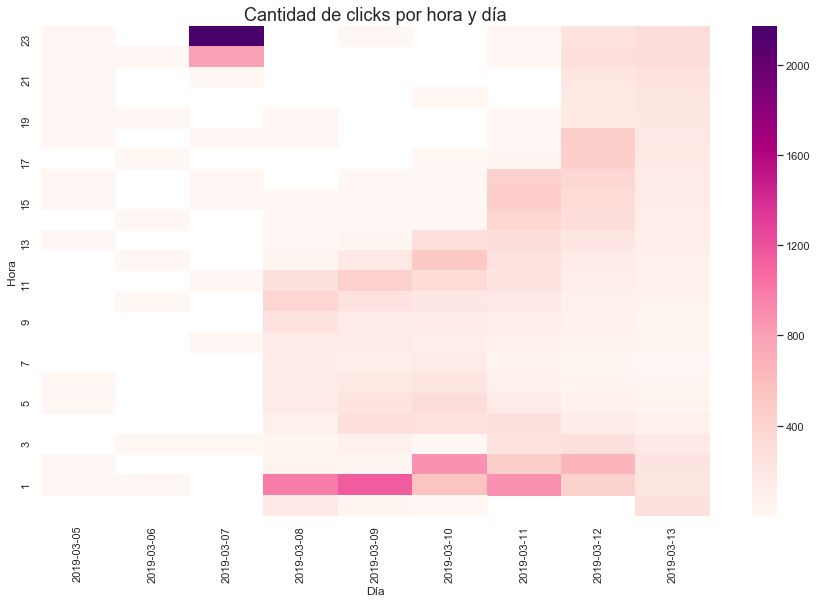

In [11]:
#Análisis de cantidad de clicks por hora y día
installs_heatmap = hora_group.pivot_table(index='hora', columns='fecha', values='cant_clicks', aggfunc='sum')
installs_heatmap = installs_heatmap.sort_index(ascending=False)
g = sns.heatmap(installs_heatmap, cmap="RdPu")
g.set_title("Cantidad de clicks por hora y día", fontsize=18)
g.set_xlabel("Día",fontsize=12)
g.set_ylabel("Hora", fontsize=12)

fig = g.get_figure()
fig.set_figwidth(15)
fig.set_figheight(9)

plt.savefig("clicks_dia_hora.png")

In [12]:
#Agrupación de días hábiles y fin de semana
hora_group.loc[(hora_group.dia_semana == 'Saturday') | (hora_group.dia_semana == 'Sunday'), 'Categoria'] = 'Día Finde' 
hora_group.loc[(hora_group.dia_semana != 'Saturday') & (hora_group.dia_semana != 'Sunday'), 'Categoria'] = 'Día Hábil'
hora_group.head()

,fecha,dia_semana,hora,cant_clicks,Categoria
0,2019-03-05,Tuesday,1,2,Día Hábil
1,2019-03-05,Tuesday,2,7,Día Hábil
2,2019-03-05,Tuesday,5,1,Día Hábil
3,2019-03-05,Tuesday,6,5,Día Hábil
4,2019-03-05,Tuesday,13,1,Día Hábil


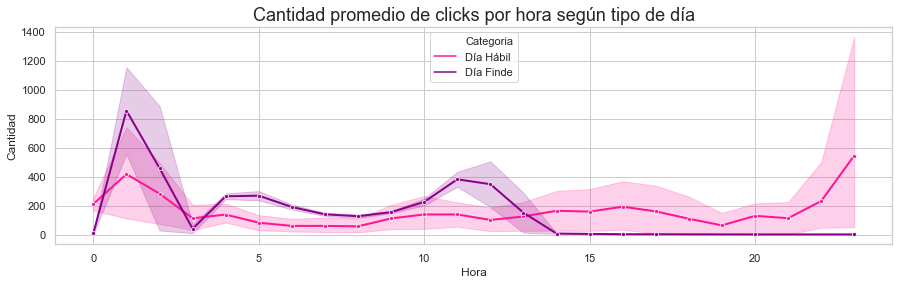

In [13]:
#Análisis de cantidad promedio de clicks por hora según tipo de día
paleta=['deeppink', 'darkmagenta']
sns.set(style="whitegrid")
fig, ax=plt.subplots(1,1, figsize=(15,4))
sns.lineplot('hora', 'cant_clicks', hue= "Categoria", palette=paleta, linewidth=2, marker='o', markersize=4, data=hora_group, ax=ax)
plt.legend(ncol=1, loc='upper center');
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Hora', fontsize=12)
plt.title('Cantidad promedio de clicks por hora según tipo de día', fontsize=18)
plt.savefig("clicks_tipo_dia_hora.png")
plt.show()

#### advertiser_id

In [14]:
clicks.advertiser_id.value_counts()

3    26263
0       70
2       12
7        2
1        2
8        1
5        1
Name: advertiser_id, dtype: int64

#### source_id

In [15]:
clicks.source_id.value_counts()

0     17009
1      4298
6      3371
5      1628
2        27
3         9
10        3
7         2
4         2
9         1
8         1
Name: source_id, dtype: int64

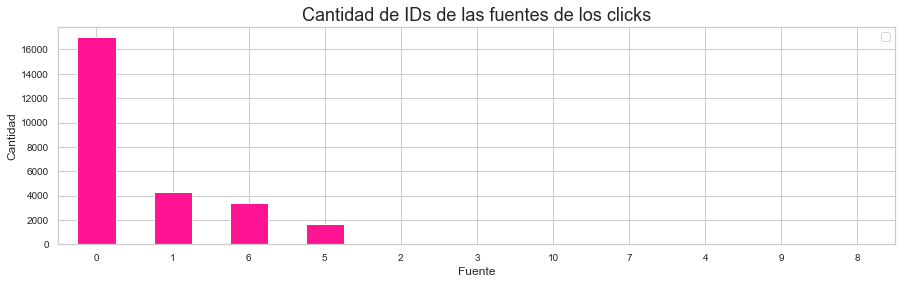

In [16]:
#Visualizar la cantidad de fuentes de clicks
sns.set(style="whitegrid")
clicks.groupby("source_id").size().sort_values(ascending=False).plot.bar(rot=0, figsize=(15,4), color='deeppink', fontsize=10);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Fuente', fontsize=12)
plt.title('Cantidad de IDs de las fuentes de los clicks', fontsize=18)
plt.legend('')
plt.savefig("clicks_source_cant.png")
plt.show()

In [17]:
#Análisis de cantidad de IDs de las fuentes de los clicks por día
clicks_source_id=clicks.groupby(["fecha", "source_id"]).size().to_frame('cantidad').reset_index()
clicks_source_id.head()

,fecha,source_id,cantidad
0,2019-03-05,0,8
1,2019-03-05,1,9
2,2019-03-05,3,5
3,2019-03-05,5,3
4,2019-03-05,6,5


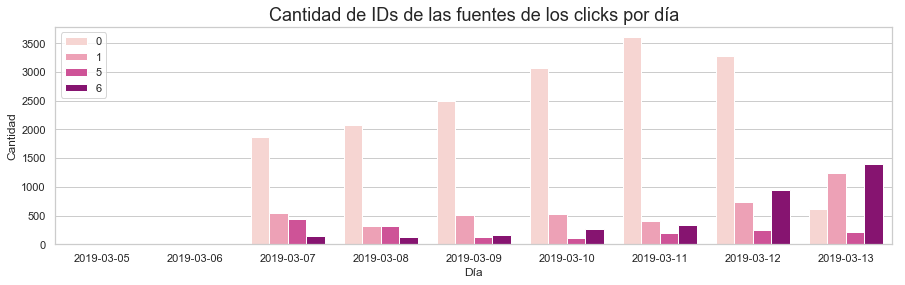

In [18]:
#Visualización de cantidad de IDs de las fuentes de los clicks por día
sns.set(style="whitegrid")
plt.figure(figsize=(15, 4))
sns.barplot(x="fecha", y="cantidad", palette="RdPu", hue="source_id",
            data=clicks_source_id[(clicks_source_id.source_id==0) | (clicks_source_id.source_id==1) | 
                                   (clicks_source_id.source_id==6) | (clicks_source_id.source_id==5)]);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Día', fontsize=12)
plt.title('Cantidad de IDs de las fuentes de los clicks por día', fontsize=18)
plt.legend(ncol=1, loc='upper left'),
plt.savefig("clicks_source_id_por_dia.png")
plt.show()

#### latitude y longitude

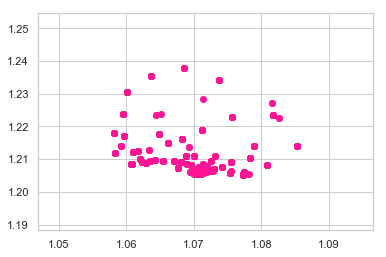

In [19]:
plt.scatter(clicks.longitude, clicks.latitude, color='deeppink')
plt.savefig('clicks_lon_lat.png')

#### wifi_connection

In [44]:
clicks.wifi_connection.value_counts()

False    26351
Name: wifi_connection, dtype: int64

#### carrier_id

In [47]:
clicks.carrier_id.value_counts().head(20)

4.0     4569
6.0     3474
1.0     3307
13.0    2998
3.0     2944
12.0    2273
0.0     1368
10.0     753
14.0     588
9.0      555
17.0     519
19.0     496
18.0     468
22.0     462
2.0      264
15.0     263
5.0      212
21.0     211
25.0     202
30.0     121
Name: carrier_id, dtype: int64

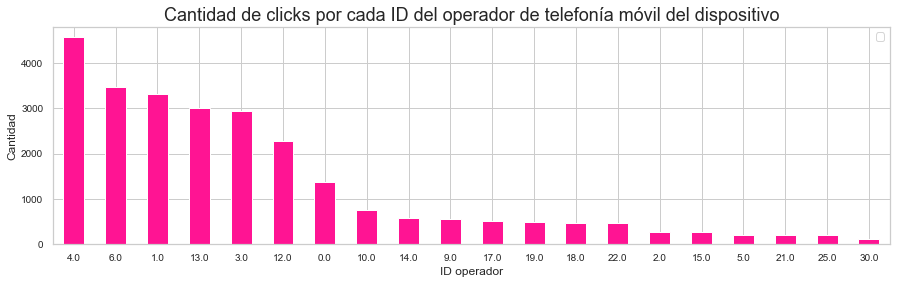

In [44]:
#Visualizar la cantidad de clicks por cada ID del operador de telefonía móvil del dispositivo
sns.set(style="whitegrid")
clicks.groupby("carrier_id").size().sort_values(ascending=False).head(20).plot.bar(rot=0, figsize=(15,4), color='deeppink', fontsize=10);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('ID operador', fontsize=12)
plt.title('Cantidad de clicks por cada ID del operador de telefonía móvil del dispositivo', fontsize=18)
plt.legend('')
plt.savefig("clicks_carrier_cant.png")
plt.show()

In [60]:
#Cantidad de clicks por cada ID del operador de telefonía móvil del dispositivo por día
clicks_operador_dia=clicks.groupby(["carrier_id", "fecha"]).size().to_frame('cantidad').reset_index()

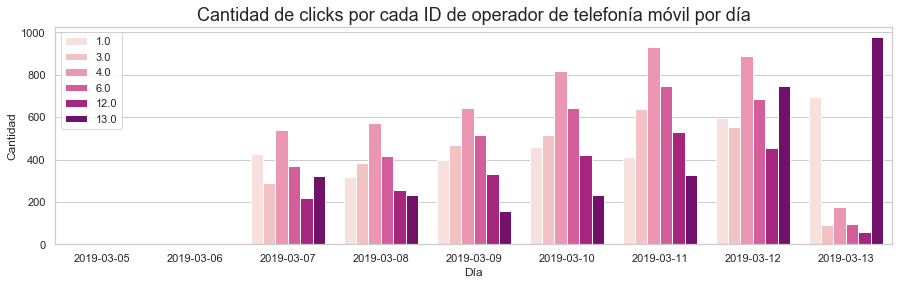

In [61]:
#Análisis de cantidad de clicks por cada ID del operador de telefonía móvil del dispositivo por día
sns.set(style="whitegrid")
plt.figure(figsize=(15, 4))
sns.barplot(x="fecha", y="cantidad", palette="RdPu", hue="carrier_id",
            data=clicks_operador_dia[(clicks_operador_dia.carrier_id==4.0) | (clicks_operador_dia.carrier_id==6.0)
                                     | (clicks_operador_dia.carrier_id==1.0) | (clicks_operador_dia.carrier_id==13.0)
                                     | (clicks_operador_dia.carrier_id==3.0) | (clicks_operador_dia.carrier_id==12.0)]);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Día', fontsize=12)
plt.title('Cantidad de clicks por cada ID de operador de telefonía móvil por día', fontsize=18)
plt.legend(ncol=1, loc='upper left'),
plt.savefig("clicks_carrier_id_por_dia.png")
plt.show()

#### trans_id

In [63]:
clicks.trans_id.value_counts().head()

BKk3u0Emw8gnZyNPffwTRU-Jp0p3DQ4    1
K1O2nIAXA4vDvPhk0oLkRaS99_9CzAM    1
yfImF7zqsg6z2v7rN9lM04cVCOWX5Sk    1
-Xg7kCdxxIsMhkgp958jEJrvYYaSZak    1
NnqjyCM71xDTECGTNyEgp7D9Pua7Jnw    1
Name: trans_id, dtype: int64

In [65]:
#Cantidad de IDs de transacción interna por día
cant_trans_id=clicks.groupby(["fecha"]).size().to_frame('cant_trans_id')
cant_trans_id

,cant_trans_id
fecha,
2019-03-05,31
2019-03-06,14
2019-03-07,2989
2019-03-08,2839
2019-03-09,3283
2019-03-10,3966
2019-03-11,4557
2019-03-12,5204
2019-03-13,3468


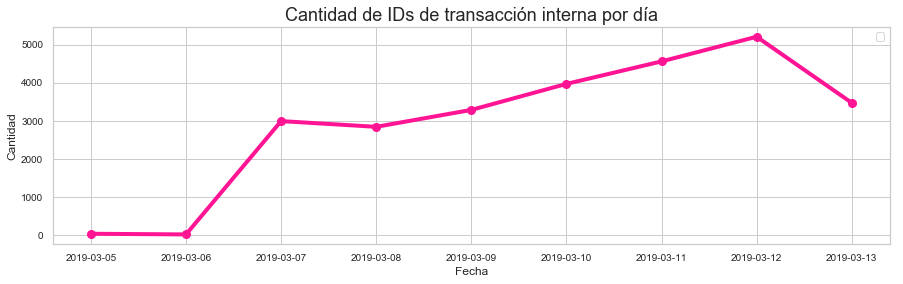

In [68]:
#Visualizar la cantidad de IDs de transacción interna por día
sns.set(style="whitegrid")
clicks.groupby(["fecha"]).size().plot.line(rot=0, figsize=(15,4), color='deeppink', linewidth=4, fontsize=10, marker='o', markersize=8);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Fecha', fontsize=12)
plt.title('Cantidad de IDs de transacción interna por día', fontsize=18)
plt.legend('')
plt.savefig("clicks_trans_id_dia.png")
plt.show()

#### os_minor

In [76]:
clicks.os_minor.value_counts().head()

3.378640e+18    6922
6.768137e+18    3747
5.975656e+18    3683
3.511538e+18    3257
6.391567e+18    3093
Name: os_minor, dtype: int64

#### agent_device

In [81]:
clicks.agent_device.value_counts().head()

3.516812e+18    656
1.754528e+18    326
6.882415e+18    156
7.787531e+18    132
4.281729e+18    122
Name: agent_device, dtype: int64

#### os_major

In [82]:
clicks.os_major.value_counts().head()

3.072849e+18    7430
4.566454e+18    6922
1.774085e+18    6304
7.452406e+18    3669
5.745805e+18     818
Name: os_major, dtype: int64

#### specs_brand

In [84]:
clicks.specs_brand.value_counts()

392184377613098015     16172
2733035977666442898    10164
8930605132947907029       10
3855167788531275156        4
5675295985273558497        1
Name: specs_brand, dtype: int64

#### brand

In [85]:
clicks.brand.value_counts()

2.0     2027
0.0     1917
1.0     1521
4.0      240
3.0      186
5.0      129
6.0      124
7.0       32
9.0       31
8.0       16
10.0       8
12.0       3
13.0       1
Name: brand, dtype: int64

In [96]:
#Cantidad de especificaciones por cada marca
brands_y_specs=clicks.groupby(["brand", "specs_brand"]).size().to_frame('cant').reset_index()
brands_y_specs.head()

,brand,specs_brand,cant
0,0.0,392184377613098015,86
1,0.0,2733035977666442898,1831
2,1.0,392184377613098015,901
3,1.0,2733035977666442898,620
4,2.0,392184377613098015,1636


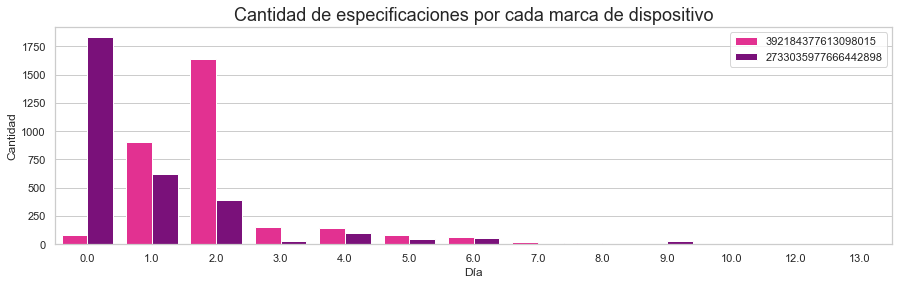

In [95]:
#Visualización de la cantidad de especificaciones por cada marca
paleta=['deeppink', 'darkmagenta']
sns.set(style="whitegrid")
plt.figure(figsize=(15, 4))
sns.barplot(x="brand", y="cant", palette=paleta, hue="specs_brand",
            data=brands_y_specs);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Día', fontsize=12)
plt.title('Cantidad de especificaciones por cada marca de dispositivo', fontsize=18)
plt.legend(ncol=1, loc='upper right'),
plt.savefig("clicks_brand_specs.png")
plt.show()

#### ref_type

In [97]:
clicks.ref_type.value_counts()

1891515180541284343    25549
1494519392962156891      739
5016171802147987303       58
6323871695571587575        5
Name: ref_type, dtype: int64

#### ref_hash

In [102]:
clicks.ref_hash.value_counts().head()

4063522808706112974    41
6841615430383729819    32
1244272413279716745    26
871778630200697460     21
1486699123421703687    21
Name: ref_hash, dtype: int64

In [33]:
#Cantidad de clicks por dispositivo por día
clicks_usuarios_cant=clicks.groupby(["ref_hash"]).size().to_frame('cantidad')
clicks_usuarios_cant['cantidad'].sort_values(ascending=False).head(10)

ref_hash
4063522808706112974    41
6841615430383729819    32
1244272413279716745    26
871778630200697460     21
1486699123421703687    21
5087801386146573665    20
925803901826809324     17
1840632706493884506    16
5410279713092214908    16
6972928558719957056    16
Name: cantidad, dtype: int64

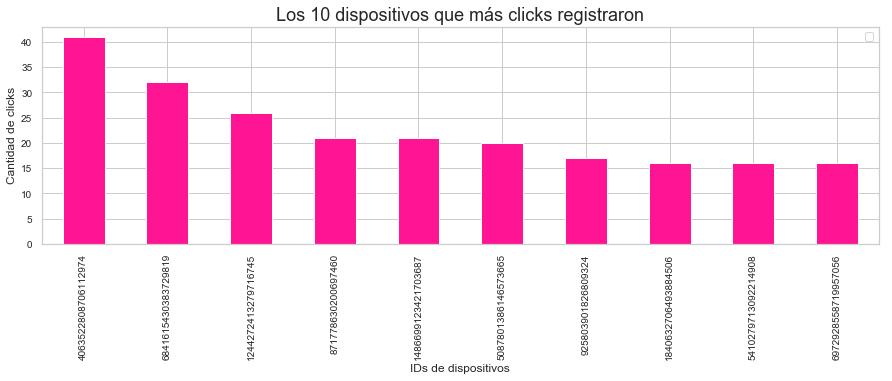

In [34]:
#Visualizar los 10 dispositivos que más clicks registraron
sns.set(style="whitegrid")
clicks_usuarios_cant['cantidad'].sort_values(ascending=False).head(10).plot.bar(rot=90, figsize=(15,4), color='deeppink', fontsize=10);
plt.ylabel('Cantidad de clicks', fontsize=12)
plt.xlabel('IDs de dispositivos', fontsize=12)
plt.title('Los 10 dispositivos que más clicks registraron', fontsize=18)
plt.legend('')
plt.savefig("clicks_10_dispositvos.png")
plt.show()

In [42]:
#Cantidad de clicks por dispositivo por día
clicks_usuarios_dia=clicks.groupby(["ref_hash", "fecha"]).size().to_frame('cantidad')
clicks_usuarios_dia['cantidad'].sort_values(ascending=False).head(10)

ref_hash             fecha     
6841615430383729819  2019-03-11    15
4063522808706112974  2019-03-12    13
519658456951133298   2019-03-12    12
1244272413279716745  2019-03-12    11
1840632706493884506  2019-03-12    10
5141358577301248038  2019-03-08    10
5410279713092214908  2019-03-13    10
4063522808706112974  2019-03-10    10
1486699123421703687  2019-03-11    10
6972928558719957056  2019-03-10     9
Name: cantidad, dtype: int64

In [38]:
#Cantidad de usuarios que hicieorn click por día
clicks_usuarios=clicks_usuarios_dia.groupby(["fecha"]).size().to_frame('cant_usuarios')
clicks_usuarios

,cant_usuarios
fecha,
2019-03-05,21
2019-03-06,11
2019-03-07,2657
2019-03-08,2404
2019-03-09,2674
2019-03-10,3096
2019-03-11,3565
2019-03-12,4040
2019-03-13,2786


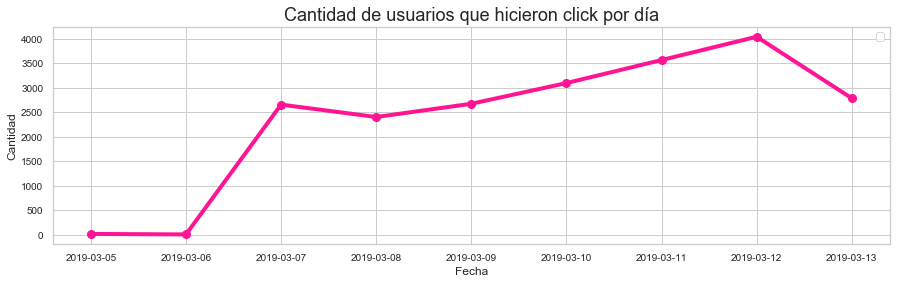

In [46]:
#Visualizar la cantidad de usuarios que clickearon por día
sns.set(style="whitegrid")
clicks_usuarios_dia.groupby(["fecha"]).size().plot.line(rot=0, figsize=(15,4), color='deeppink', linewidth=4, fontsize=10, marker='o', markersize=8);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Fecha', fontsize=12)
plt.title('Cantidad de usuarios que hicieron click por día', fontsize=18)
plt.legend('')
plt.savefig("click_de_usuarios_dia.png")
plt.show()